In [1]:
from keras.layers import Input, Dense,Dropout, Flatten,Lambda
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split as tts
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.utils import np_utils,plot_model
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Conv2D
from keras import backend as K
from keras.losses import categorical_hinge,categorical_crossentropy
import tensorflow as tf
#from tensorflow.layers import flatten,batch_normialization as batch_norm

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## load data

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
Xtr,Xval,Ytr,Yval = tts(x_train,Y_train,test_size = 0.3)

## import defined modules

In [6]:
import sys
sys.path.append('../')
from cifar_clf import *
from cifar_dae import *

In [11]:
cifar_cnn = Cifar10_CNN(x_train,Y_train,num_batch=128,num_epoch=50)

In [12]:
print(Xtr.shape)

(35000, 32, 32, 3)


In [13]:
#len(cifar_cnn.batch_gen.get_batch())

### train classifer

In [15]:
cifar_cnn.train("cifar_CNN_clf.ckpt")
#cifar_cnn.restore("cifar_CNN_clf.ckpt")

[0/5850] Loss: 2.351620 Train_Acc: 0.0625 Val_Acc: 0.0859
[500/5850] Loss: 1.015297 Train_Acc: 0.6875 Val_Acc: 0.5312
[1000/5850] Loss: 0.400769 Train_Acc: 0.8984 Val_Acc: 0.6719
[1500/5850] Loss: 0.181338 Train_Acc: 0.9844 Val_Acc: 0.7109
[2000/5850] Loss: 0.066226 Train_Acc: 1.0000 Val_Acc: 0.7031
[2500/5850] Loss: 0.095856 Train_Acc: 0.9922 Val_Acc: 0.6562
[3000/5850] Loss: 0.076681 Train_Acc: 1.0000 Val_Acc: 0.6562
[3500/5850] Loss: 0.074508 Train_Acc: 0.9922 Val_Acc: 0.6406
[4000/5850] Loss: 0.015397 Train_Acc: 1.0000 Val_Acc: 0.6641
[4500/5850] Loss: 0.025514 Train_Acc: 1.0000 Val_Acc: 0.6484
[5000/5850] Loss: 0.003510 Train_Acc: 1.0000 Val_Acc: 0.6719
[5500/5850] Loss: 0.072923 Train_Acc: 1.0000 Val_Acc: 0.6875
saved path:  ../logs/cifar_CNN_clf.ckpt


In [16]:
cifar_cnn.accuracy_score(x_test,Y_test)

0.63461538461538458

# PGD targeted attacks

In [21]:
cifar_cnn.targeted_attack(x_test,Y_test,file_name = 'cifar10_adv')

[0/10000] processed
[100/10000] processed
[200/10000] processed
[300/10000] processed
[400/10000] processed
[500/10000] processed
[600/10000] processed
[700/10000] processed
[800/10000] processed
[900/10000] processed
[1000/10000] processed
[1100/10000] processed
[1200/10000] processed
[1300/10000] processed
[1400/10000] processed
[1500/10000] processed
[1600/10000] processed
[1700/10000] processed
[1800/10000] processed
[1900/10000] processed
[2000/10000] processed
[2100/10000] processed
[2200/10000] processed
[2300/10000] processed
[2400/10000] processed
[2500/10000] processed
[2600/10000] processed
[2700/10000] processed
[2800/10000] processed
[2900/10000] processed
[3000/10000] processed
[3100/10000] processed
[3200/10000] processed
[3300/10000] processed
[3400/10000] processed
[3500/10000] processed
[3600/10000] processed
[3700/10000] processed
[3800/10000] processed
[3900/10000] processed
[4000/10000] processed
[4100/10000] processed
[4200/10000] processed
[4300/10000] processed


# Train DAE 

In [84]:
cifar_dae = Cifar_DAE(x_train,Y_train,noise_scale = 0.1,dae_type = "over",filter_nums = [64,32],
                      loss_type = "binary_crossentropy",epoch = 10) 
# default is mse nosise!

In [85]:
cifar_dae.train_dae()

loss type is binary_crossentropy
dae network is over
train the DAE model with noise gaussian  ( 0.1 )
Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 9s 270us/step - loss: 0.6085 - val_loss: 0.5785
Epoch 2/10
35000/35000 [==============================] - 9s 266us/step - loss: 0.5704 - val_loss: 0.5688
Epoch 3/10
35000/35000 [==============================] - 9s 267us/step - loss: 0.5653 - val_loss: 0.5641
Epoch 4/10
35000/35000 [==============================] - 9s 268us/step - loss: 0.5623 - val_loss: 0.5604
Epoch 5/10
35000/35000 [==============================] - 9s 267us/step - loss: 0.5608 - val_loss: 0.5609
Epoch 6/10
35000/35000 [==============================] - 9s 267us/step - loss: 0.5595 - val_loss: 0.5583
Epoch 7/10
35000/35000 [==============================] - 9s 267us/step - loss: 0.5585 - val_loss: 0.5583
Epoch 8/10
35000/35000 [==============================] - 9s 268us/step - loss: 0.5579 - val_loss: 0.5569


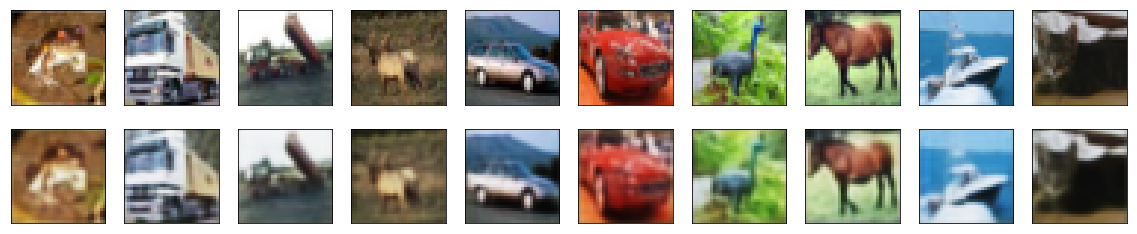

In [94]:
cifar_dae.plot_imgs(x_train,noise_type = 'gaussian',noise_scale = 0.00)

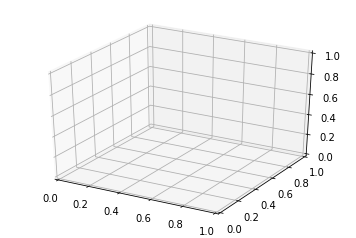

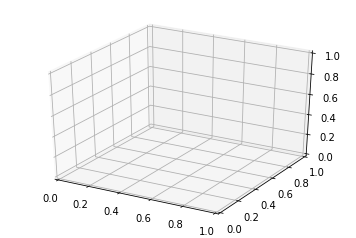

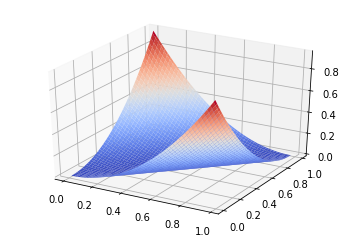

In [93]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
def fun(x,y):
    return x*np.log(y)+(1-x)*np.log(1-y)
def fun2(x,y):
    return np.square(x-y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx = yy = np.arange(0.01, 0.99, 0.01)
X, Y = np.meshgrid(xx, yy)
zs = np.array([fun2(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap=cm.coolwarm)
plt.show()

In [95]:
cifar_dae.dae_type

'over'

## Images

### visualize images separately

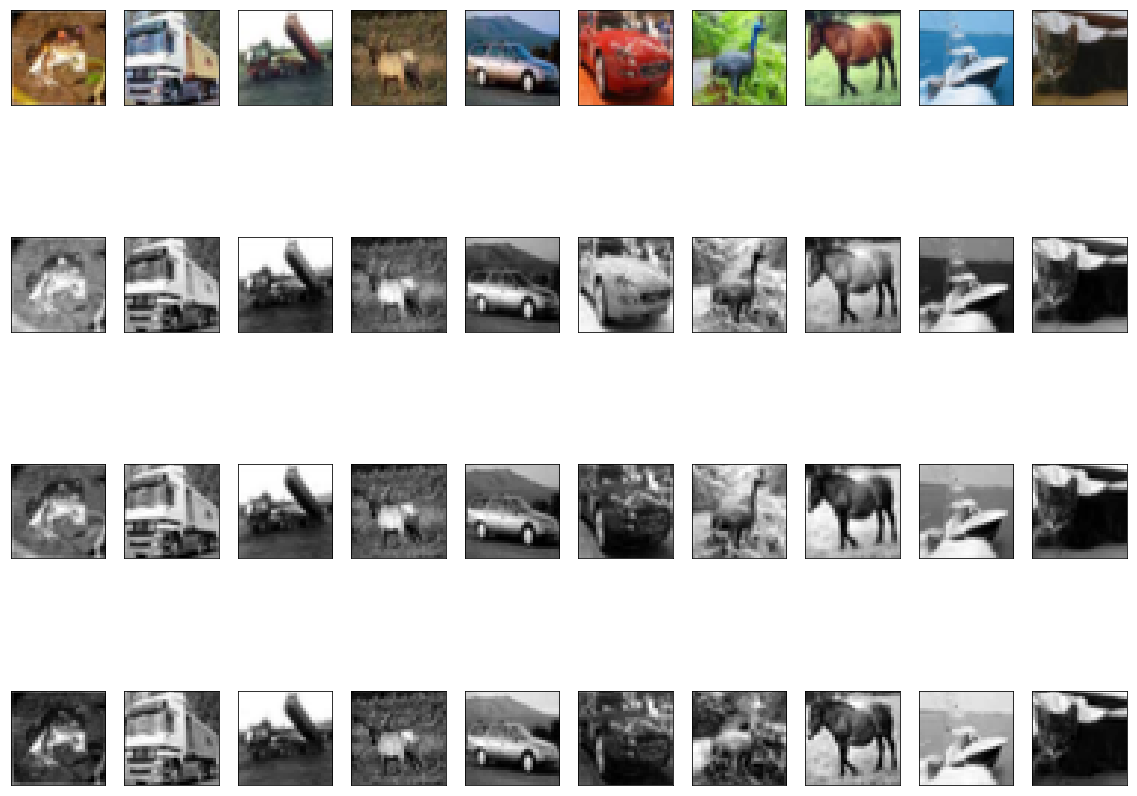

In [96]:
n=10
plt.figure(figsize = (20,16))
for i in range(n):
    ax = plt.subplot(4,n,i+1)
    plt.imshow(x_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(4,n,i+1+n)
    plt.imshow(x_train[i,:,:,0],'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(4,n,i+1+2*n)
    plt.imshow(x_train[i,:,:,1],'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(4,n,i+1+n*3)
    plt.imshow(x_train[i,:,:,2],'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [57]:
def draw_plot(imgs,n = None,figsize = None, rgb =True):                    
    if n is None:                                       
        n = len(imgs)                                   
    if figsize is None:
        figsize = (20,4)
    plt.figure(figsize = figsize)
    for i in range(n):                                  
        if rgb:                                         
            ax = plt.subplot(n,4,4*i+1)                
            plt.imshow(imgs[i])                         
            ax.get_xaxis().set_visible(False)           
            ax.get_yaxis().set_visible(False)           
            ax = plt.subplot(n,4,4*i+2)                
            plt.imshow(imgs[i,:,:,0],'gray')            
            ax.get_xaxis().set_visible(False)           
            ax.get_yaxis().set_visible(False)           
            ax = plt.subplot(n,4,4*i+3)                
            plt.imshow(imgs[i,:,:,1],'gray')            
            ax.get_xaxis().set_visible(False)           
            ax.get_yaxis().set_visible(False)           
            ax = plt.subplot(n,4,4*i+4)                
            plt.imshow(imgs[i,:,:,2],'gray')            
            ax.get_xaxis().set_visible(False)           
            ax.get_yaxis().set_visible(False)           
        else:                                           
            ax = plt.subplot(1,n,i+1)                   
            plt.imshow(imgs[i])                         
            ax.get_xaxis().set_visible(False)           
            ax.get_yaxis().set_visible(False)           
    plt.show()

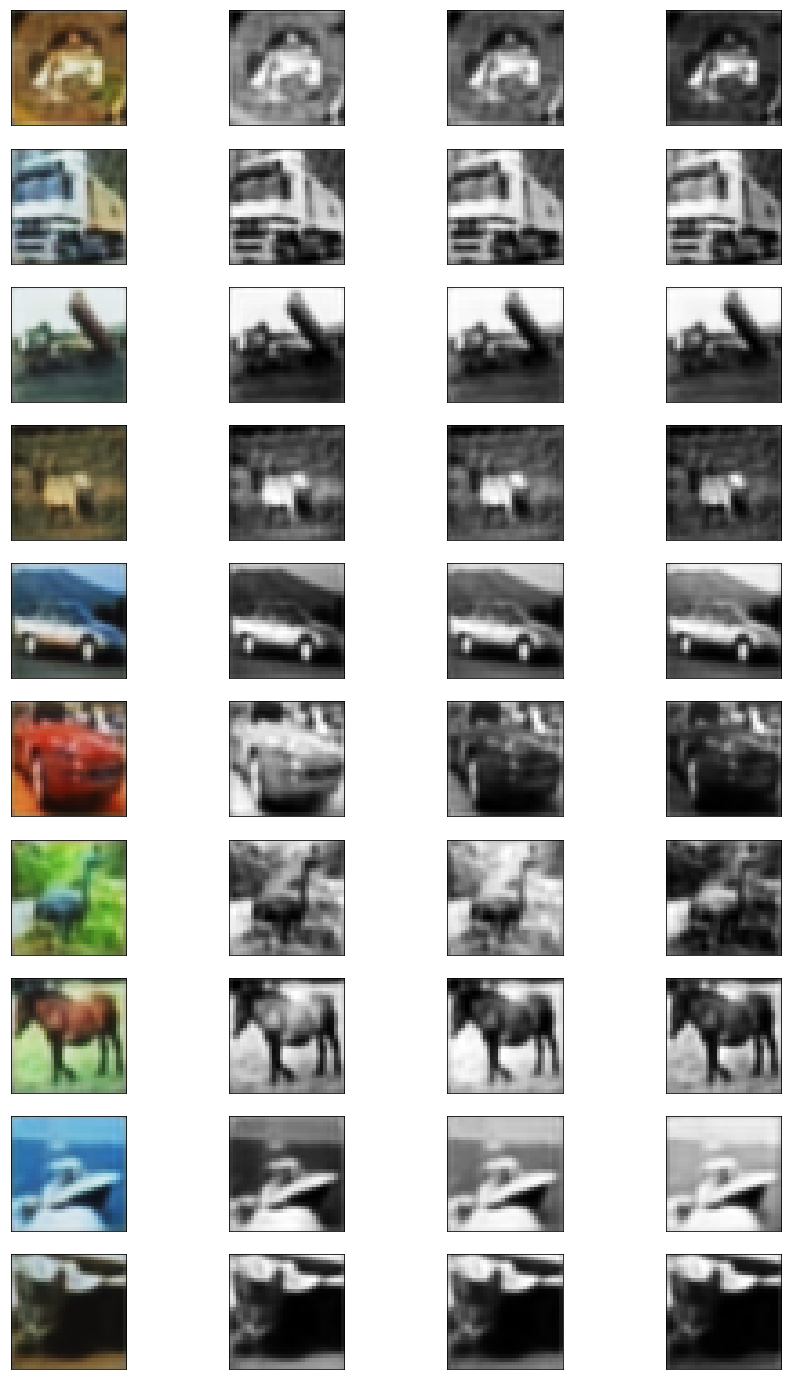

In [81]:
draw_plot(cifar_dae.autoencoder.predict(x_train),n=10,figsize = (15,25))

## Noise comparison

### Pepper and Salt noises

In [100]:
_,x_noisy = corrupt(x_test,scale = 0.2, noise_type = "peppSalt")
print("noised accuracy: ",cifar_cnn.accuracy_score(x_noisy,Y_test))
x_dae = cifar_dae.autoencoder.predict(x_noisy)
print("dae accuracy:", cifar_cnn.accuracy_score(x_dae,Y_test))
x_ds = cifar_dae.apply_DS(x_noisy,vr=0.95,max_iter = 35)
print("DS accuracy:",cifar_cnn.accuracy_score(x_ds,Y_test))

noised accuracy:  0.400140224359
dae accuracy: 0.477363782051
DS accuracy: 0.461939102564


In [104]:
## clean dataset
x_prj = cifar_dae.autoencoder.predict(x_test)
x_c_ds = cifar_dae.apply_DS(x_test,vr=0.95,max_iter = 10)
print("clean accuracy: ",cifar_cnn.accuracy_score(x_test,Y_test))
print("projected accuracy: ",cifar_cnn.accuracy_score(x_prj,Y_test))
print("DS accuracy: ",cifar_cnn.accuracy_score(x_c_ds,Y_test))

clean accuracy:  0.634615384615
projected accuracy:  0.601161858974
DS accuracy:  0.618289262821


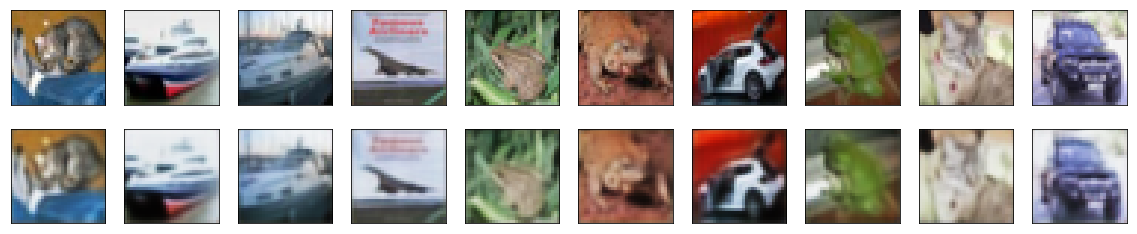

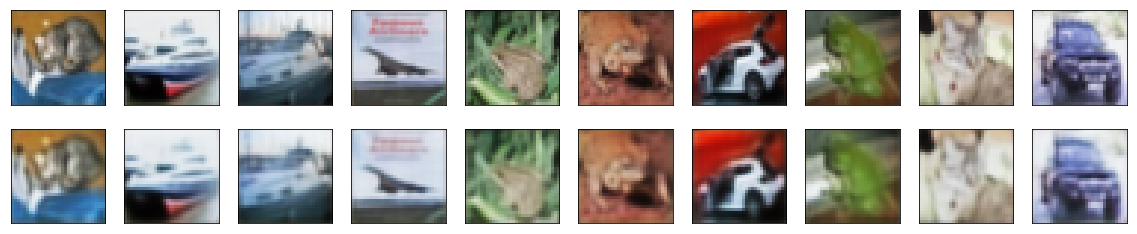

In [106]:
cifar_dae.plot_imgs(x_test,noise_type = 'peppSalt',noise_scale = 0.0)
cifar_dae.plot_imgs(x_c_ds,noise_type = 'gaussian',noise_scale = 0.00)

### adversarial noises

In [36]:
x_adv = cifar_cnn.advX
print(cifar_cnn.accuracy_score(x_adv,Y_test))
x_adv_dae = cifar_dae.autoencoder.predict(x_adv)
print(cifar_cnn.accuracy_score(x_adv_dae,Y_test))
x_adv_ds = cifar_dae.apply_DS(x_adv,vr=0.95,max_iter=40)
print("DS accuracy:",cifar_cnn.accuracy_score(x_adv_ds,Y_test))

0.192608173077
0.30608974359
DS accuracy: 0.336338141026


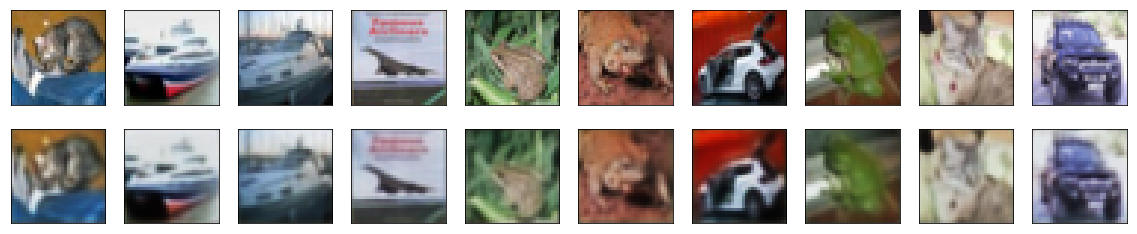

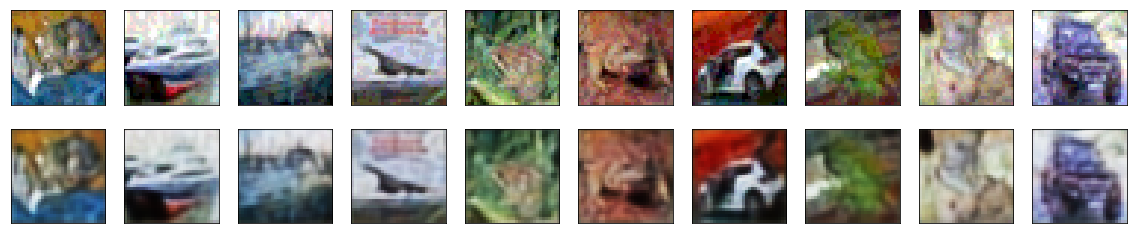

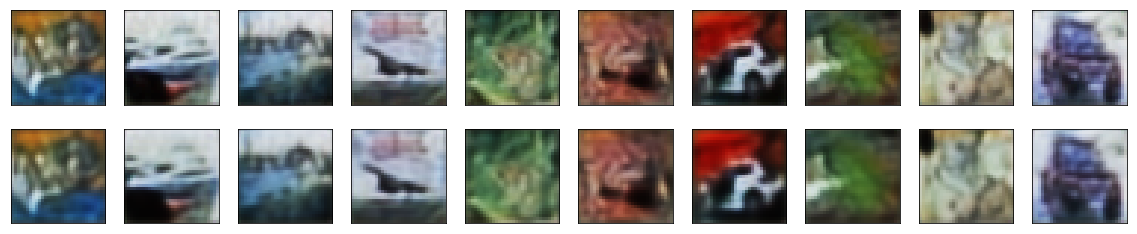

In [40]:
cifar_dae.plot_imgs(x_test,noise_type = 'peppSalt',noise_scale = 0.0)
cifar_dae.plot_imgs(x_adv,noise_type = 'gaussian',noise_scale = 0.00)
cifar_dae.plot_imgs(x_adv_ds,noise_type = 'gaussian',noise_scale = 0.00)

In [54]:
x_ds = cifar_dae.apply_DS(x_noisy)

In [57]:
print(cifar_cnn.accuracy_score(x_ds,Y_test))

0.463741987179


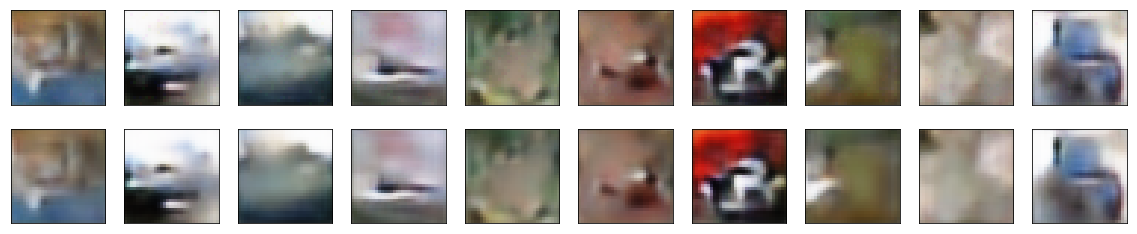

In [58]:
cifar_dae.plot_imgs(x_ds,noise_type = 'peppSalt',noise_scale = 0.0)